In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as pl
from matplotlib import rcParams
from seaborn import pairplot

In [31]:
%matplotlib inline
rcParams['axes.titlesize'] = 18
rcParams['xtick.labelsize'] = 16
rcParams['axes.labelsize'] = 16
rcParams['ytick.labelsize'] = 16
rcParams['font.size'] = 16

In [3]:
def is_in_polygon(row):
    pnt = Point(row.lon, row.lat)
    dist_dict = {}
    for pcat, coords in zip (dl.ProvCat, dl.coords):
        poly = Polygon(coords)
        if pnt.within(poly):
            return pcat
        else:
            dist_dict[pcat] = poly.distance(pnt)
    return min(dist_dict, key=dist_dict.get)

def get_addnl_loc_data(row, col):
    return dl.loc[dl.ProvCat == row.ProvCat, col].values[0]

In [4]:
df_chl = pd.read_pickle('./pickleJar/df_4_ML4chl.pkl')

In [5]:
dl = pd.read_pickle('./pickleJar/d_longhurst.pkl')

In [6]:
df_chl.head()

,datetime,lat,lon,oisst,etopo2,solz,sat_rho_rc412,sat_rho_rc443,sat_rho_rc490,sat_rho_rc510,sat_rho_rc555,sat_rho_rc670,chl_fluo,chl_hplc,chl,log10_chl,is_hplc
0,1997-10-11 09:32:00,39.2900,25.1100,19.57,462.0,48.7,0.012088,0.012417,0.011739,0.010579,0.009110,0.006655,0.091,NaN,0.091,-1.040959,False
1,2000-02-22 17:00:00,-61.4500,-62.2990,2.54,3549.0,51.2,0.010525,0.010636,0.009614,0.007913,0.006224,0.004794,0.132,0.118,0.118,-0.928118,True
2,2001-02-19 16:10:00,-61.2900,-56.2900,0.78,330.0,52.7,0.004443,0.004387,0.004240,0.003686,0.002646,0.001177,NaN,NaN,NaN,NaN,False
3,2002-01-22 13:45:00,-60.9990,-56.4980,1.79,2193.0,45.9,0.005869,0.005866,0.005535,0.004643,0.003326,0.001747,0.707,0.614,0.614,-0.211832,True
4,1997-09-27 11:29:00,24.1392,-20.9995,24.67,4369.0,28.0,0.009464,0.008968,0.007719,0.005974,0.004161,0.002517,NaN,0.158,0.158,-0.801343,True


In [7]:
df_chl[df_chl.sat_rho_rc412==0]

,datetime,lat,lon,oisst,etopo2,solz,sat_rho_rc412,sat_rho_rc443,sat_rho_rc490,sat_rho_rc510,sat_rho_rc555,sat_rho_rc670,chl_fluo,chl_hplc,chl,log10_chl,is_hplc
174,2001-08-28 20:05:00,27.236,-83.469,29.9,42.0,20.3,0.0,0.0,0.0,0.0,0.0,0.0,0.14052,NaN,0.14052,-0.852262,False


In [8]:
df_chl.insert(df_chl.columns.get_loc('lon')+1, 'ProvCat',
              df_chl.apply(is_in_polygon, axis=1))

In [9]:
df_chl.head()

,datetime,lat,lon,ProvCat,oisst,etopo2,solz,sat_rho_rc412,sat_rho_rc443,sat_rho_rc490,sat_rho_rc510,sat_rho_rc555,sat_rho_rc670,chl_fluo,chl_hplc,chl,log10_chl,is_hplc
0,1997-10-11 09:32:00,39.2900,25.1100,42,19.57,462.0,48.7,0.012088,0.012417,0.011739,0.010579,0.009110,0.006655,0.091,NaN,0.091,-1.040959,False
1,2000-02-22 17:00:00,-61.4500,-62.2990,22,2.54,3549.0,51.2,0.010525,0.010636,0.009614,0.007913,0.006224,0.004794,0.132,0.118,0.118,-0.928118,True
2,2001-02-19 16:10:00,-61.2900,-56.2900,25,0.78,330.0,52.7,0.004443,0.004387,0.004240,0.003686,0.002646,0.001177,NaN,NaN,NaN,NaN,False
3,2002-01-22 13:45:00,-60.9990,-56.4980,25,1.79,2193.0,45.9,0.005869,0.005866,0.005535,0.004643,0.003326,0.001747,0.707,0.614,0.614,-0.211832,True
4,1997-09-27 11:29:00,24.1392,-20.9995,33,24.67,4369.0,28.0,0.009464,0.008968,0.007719,0.005974,0.004161,0.002517,NaN,0.158,0.158,-0.801343,True


In [11]:
dl_cols_to_xtract = ['Biome', 'BiomCat', 'Province', 'ProvCode', 'ProvCat']

In [12]:
dl.loc[dl.ProvCat==2, dl_cols_to_xtract]

,Biome,BiomCat,Province,ProvCode,ProvCat
2,Coastal,0,Benguela Current Coastal Province,BENG,2


In [13]:
df = df_chl.copy()

In [14]:
for col in dl_cols_to_xtract[:-1]:
    print(col)
    df.insert(df.columns.get_loc('ProvCat'), col,
              df.apply(get_addnl_loc_data, col=col, axis=1))

Biome
BiomCat
Province
ProvCode


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 495 entries, 0 to 494
Data columns (total 22 columns):
datetime         495 non-null datetime64[ns]
lat              495 non-null float64
lon              495 non-null float64
Biome            495 non-null object
BiomCat          495 non-null int64
Province         495 non-null object
ProvCode         495 non-null object
ProvCat          495 non-null int64
oisst            495 non-null float64
etopo2           495 non-null float64
solz             495 non-null float64
sat_rho_rc412    495 non-null float64
sat_rho_rc443    495 non-null float64
sat_rho_rc490    495 non-null float64
sat_rho_rc510    495 non-null float64
sat_rho_rc555    495 non-null float64
sat_rho_rc670    495 non-null float64
chl_fluo         364 non-null float64
chl_hplc         158 non-null float64
chl              424 non-null float64
log10_chl        424 non-null float64
is_hplc          495 non-null bool
dtypes: bool(1), datetime64[ns](1), float64(15), int64(2), obj

In [16]:
df.loc[df.sat_rho_rc412==0]

,datetime,lat,lon,Biome,BiomCat,Province,ProvCode,ProvCat,oisst,etopo2,...,sat_rho_rc443,sat_rho_rc490,sat_rho_rc510,sat_rho_rc555,sat_rho_rc670,chl_fluo,chl_hplc,chl,log10_chl,is_hplc
174,2001-08-28 20:05:00,27.236,-83.469,Westerlies,3,N. Pacific Subtropical Gyre Province (West),NPSW,47,29.9,42.0,...,0.0,0.0,0.0,0.0,0.0,0.14052,NaN,0.14052,-0.852262,False


In [17]:
df.drop(index=174, inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 494 entries, 0 to 494
Data columns (total 22 columns):
datetime         494 non-null datetime64[ns]
lat              494 non-null float64
lon              494 non-null float64
Biome            494 non-null object
BiomCat          494 non-null int64
Province         494 non-null object
ProvCode         494 non-null object
ProvCat          494 non-null int64
oisst            494 non-null float64
etopo2           494 non-null float64
solz             494 non-null float64
sat_rho_rc412    494 non-null float64
sat_rho_rc443    494 non-null float64
sat_rho_rc490    494 non-null float64
sat_rho_rc510    494 non-null float64
sat_rho_rc555    494 non-null float64
sat_rho_rc670    494 non-null float64
chl_fluo         363 non-null float64
chl_hplc         158 non-null float64
chl              423 non-null float64
log10_chl        423 non-null float64
is_hplc          494 non-null bool
dtypes: bool(1), datetime64[ns](1), float64(15), int64(2), obj

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
lat,494.0,28.890834,20.609094,-67.643000,26.936650,32.410000,42.352250,79.000000
lon,494.0,-70.934556,41.550826,-170.198000,-83.386450,-75.961200,-66.998500,171.716000
BiomCat,494.0,1.536437,1.375565,0.000000,0.000000,2.000000,3.000000,3.000000
ProvCat,494.0,28.882591,16.174203,2.000000,17.000000,29.000000,46.000000,50.000000
oisst,494.0,19.044089,6.973292,0.780000,13.772500,19.600000,25.027500,30.510000
etopo2,494.0,770.433198,1411.802763,0.000000,20.250000,156.000000,519.500000,5529.000000
solz,494.0,31.314170,14.531983,0.000000,20.700000,32.300000,42.650000,69.900000
sat_rho_rc412,494.0,0.006756,0.003868,0.001360,0.003726,0.005999,0.008869,0.020979
sat_rho_rc443,494.0,0.007039,0.003629,0.001656,0.004210,0.006646,0.008943,0.020130
sat_rho_rc490,494.0,0.007258,0.003441,0.001897,0.004528,0.006869,0.009147,0.018906


In [20]:
def is_coastal(row):
    if row['Biome'] == 'Coastal':
        return 1
    else:
        return 0

In [21]:
df.insert(df.columns.get_loc('ProvCat'), 'Coastal', df.apply(is_coastal, axis=1))

In [22]:
df.head()

,datetime,lat,lon,Biome,BiomCat,Province,ProvCode,Coastal,ProvCat,oisst,...,sat_rho_rc443,sat_rho_rc490,sat_rho_rc510,sat_rho_rc555,sat_rho_rc670,chl_fluo,chl_hplc,chl,log10_chl,is_hplc
0,1997-10-11 09:32:00,39.2900,25.1100,Westerlies,3,"Mediterranean Sea, Black Sea Province",MEDI,0,42,19.57,...,0.012417,0.011739,0.010579,0.009110,0.006655,0.091,NaN,0.091,-1.040959,False
1,2000-02-22 17:00:00,-61.4500,-62.2990,Polar,1,Antarctic Province,ANTA,0,22,2.54,...,0.010636,0.009614,0.007913,0.006224,0.004794,0.132,0.118,0.118,-0.928118,True
2,2001-02-19 16:10:00,-61.2900,-56.2900,Polar,1,Austral Polar Province,APLR,0,25,0.78,...,0.004387,0.004240,0.003686,0.002646,0.001177,NaN,NaN,NaN,NaN,False
3,2002-01-22 13:45:00,-60.9990,-56.4980,Polar,1,Austral Polar Province,APLR,0,25,1.79,...,0.005866,0.005535,0.004643,0.003326,0.001747,0.707,0.614,0.614,-0.211832,True
4,1997-09-27 11:29:00,24.1392,-20.9995,Trades,2,N. Atlantic Tropical Gyral Province (Trpg),NATR,0,33,24.67,...,0.008968,0.007719,0.005974,0.004161,0.002517,NaN,0.158,0.158,-0.801343,True


In [23]:
df.head()

,datetime,lat,lon,Biome,BiomCat,Province,ProvCode,Coastal,ProvCat,oisst,...,sat_rho_rc443,sat_rho_rc490,sat_rho_rc510,sat_rho_rc555,sat_rho_rc670,chl_fluo,chl_hplc,chl,log10_chl,is_hplc
0,1997-10-11 09:32:00,39.2900,25.1100,Westerlies,3,"Mediterranean Sea, Black Sea Province",MEDI,0,42,19.57,...,0.012417,0.011739,0.010579,0.009110,0.006655,0.091,NaN,0.091,-1.040959,False
1,2000-02-22 17:00:00,-61.4500,-62.2990,Polar,1,Antarctic Province,ANTA,0,22,2.54,...,0.010636,0.009614,0.007913,0.006224,0.004794,0.132,0.118,0.118,-0.928118,True
2,2001-02-19 16:10:00,-61.2900,-56.2900,Polar,1,Austral Polar Province,APLR,0,25,0.78,...,0.004387,0.004240,0.003686,0.002646,0.001177,NaN,NaN,NaN,NaN,False
3,2002-01-22 13:45:00,-60.9990,-56.4980,Polar,1,Austral Polar Province,APLR,0,25,1.79,...,0.005866,0.005535,0.004643,0.003326,0.001747,0.707,0.614,0.614,-0.211832,True
4,1997-09-27 11:29:00,24.1392,-20.9995,Trades,2,N. Atlantic Tropical Gyral Province (Trpg),NATR,0,33,24.67,...,0.008968,0.007719,0.005974,0.004161,0.002517,NaN,0.158,0.158,-0.801343,True


In [24]:
df.Biome.value_counts()

Coastal       206
Westerlies    199
Trades         73
Polar          16
Name: Biome, dtype: int64

In [25]:
df.Coastal.value_counts()

0    288
1    206
Name: Coastal, dtype: int64

In [26]:
df.to_pickle('./pickleJar/df_4_AllFeatures_n_Longhurst.pkl')

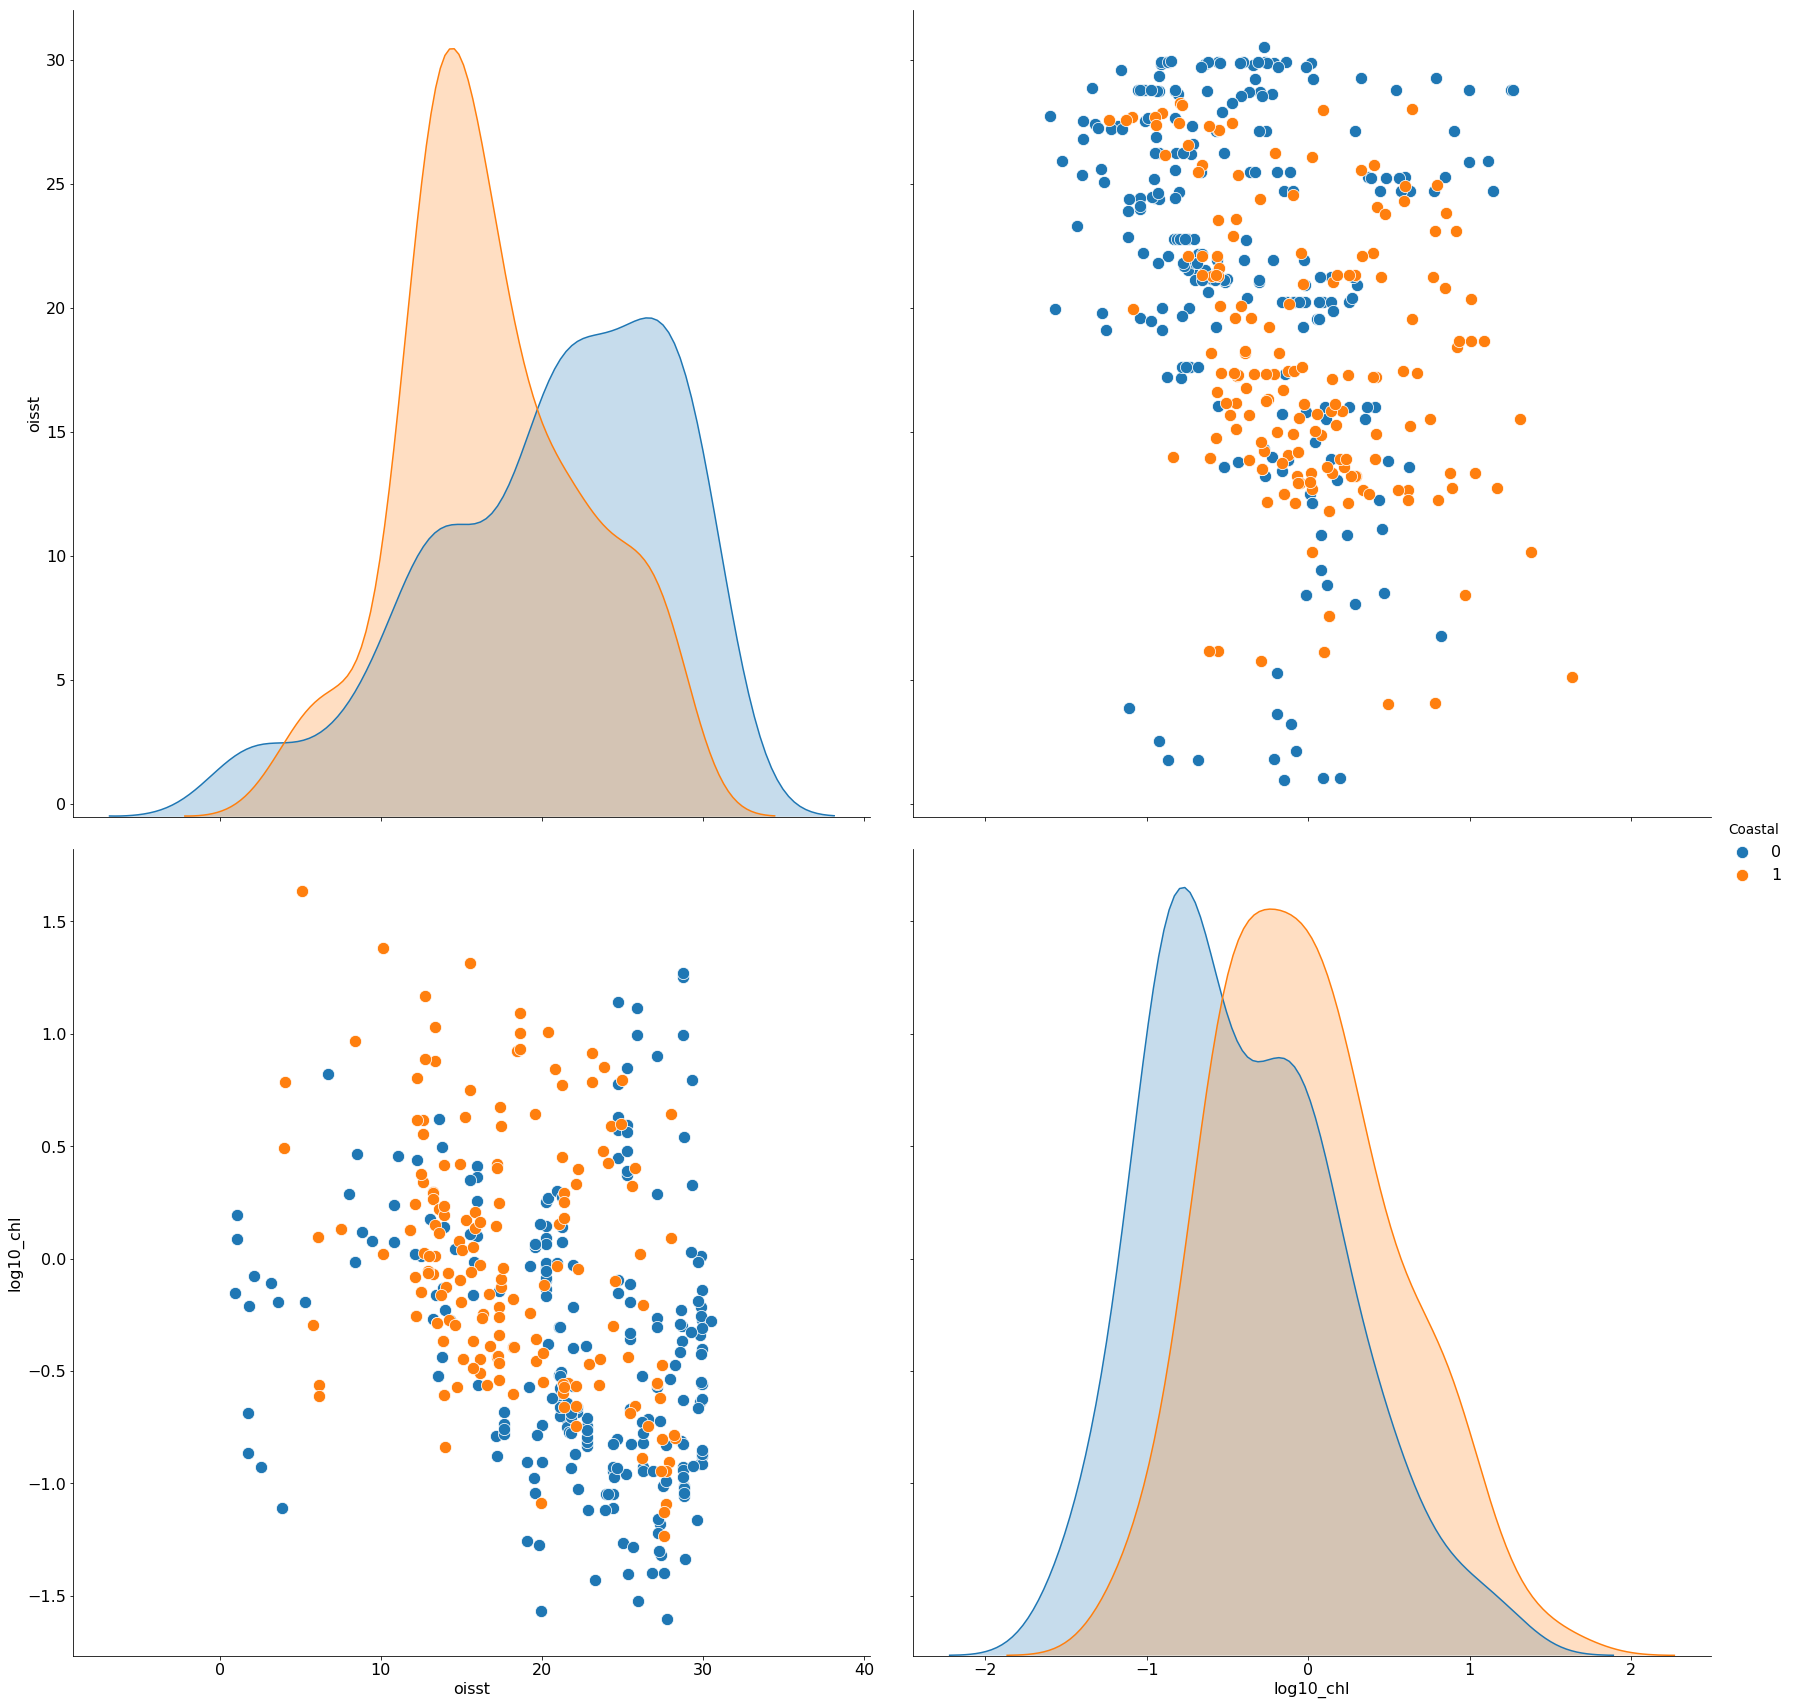

In [33]:
pg = pairplot(df[['oisst', 'log10_chl',  'Coastal']],
              vars=['oisst', 'log10_chl'], hue='Coastal', height=12,
              plot_kws={'s': 150})
pl.rcParams.update(**rcParams)

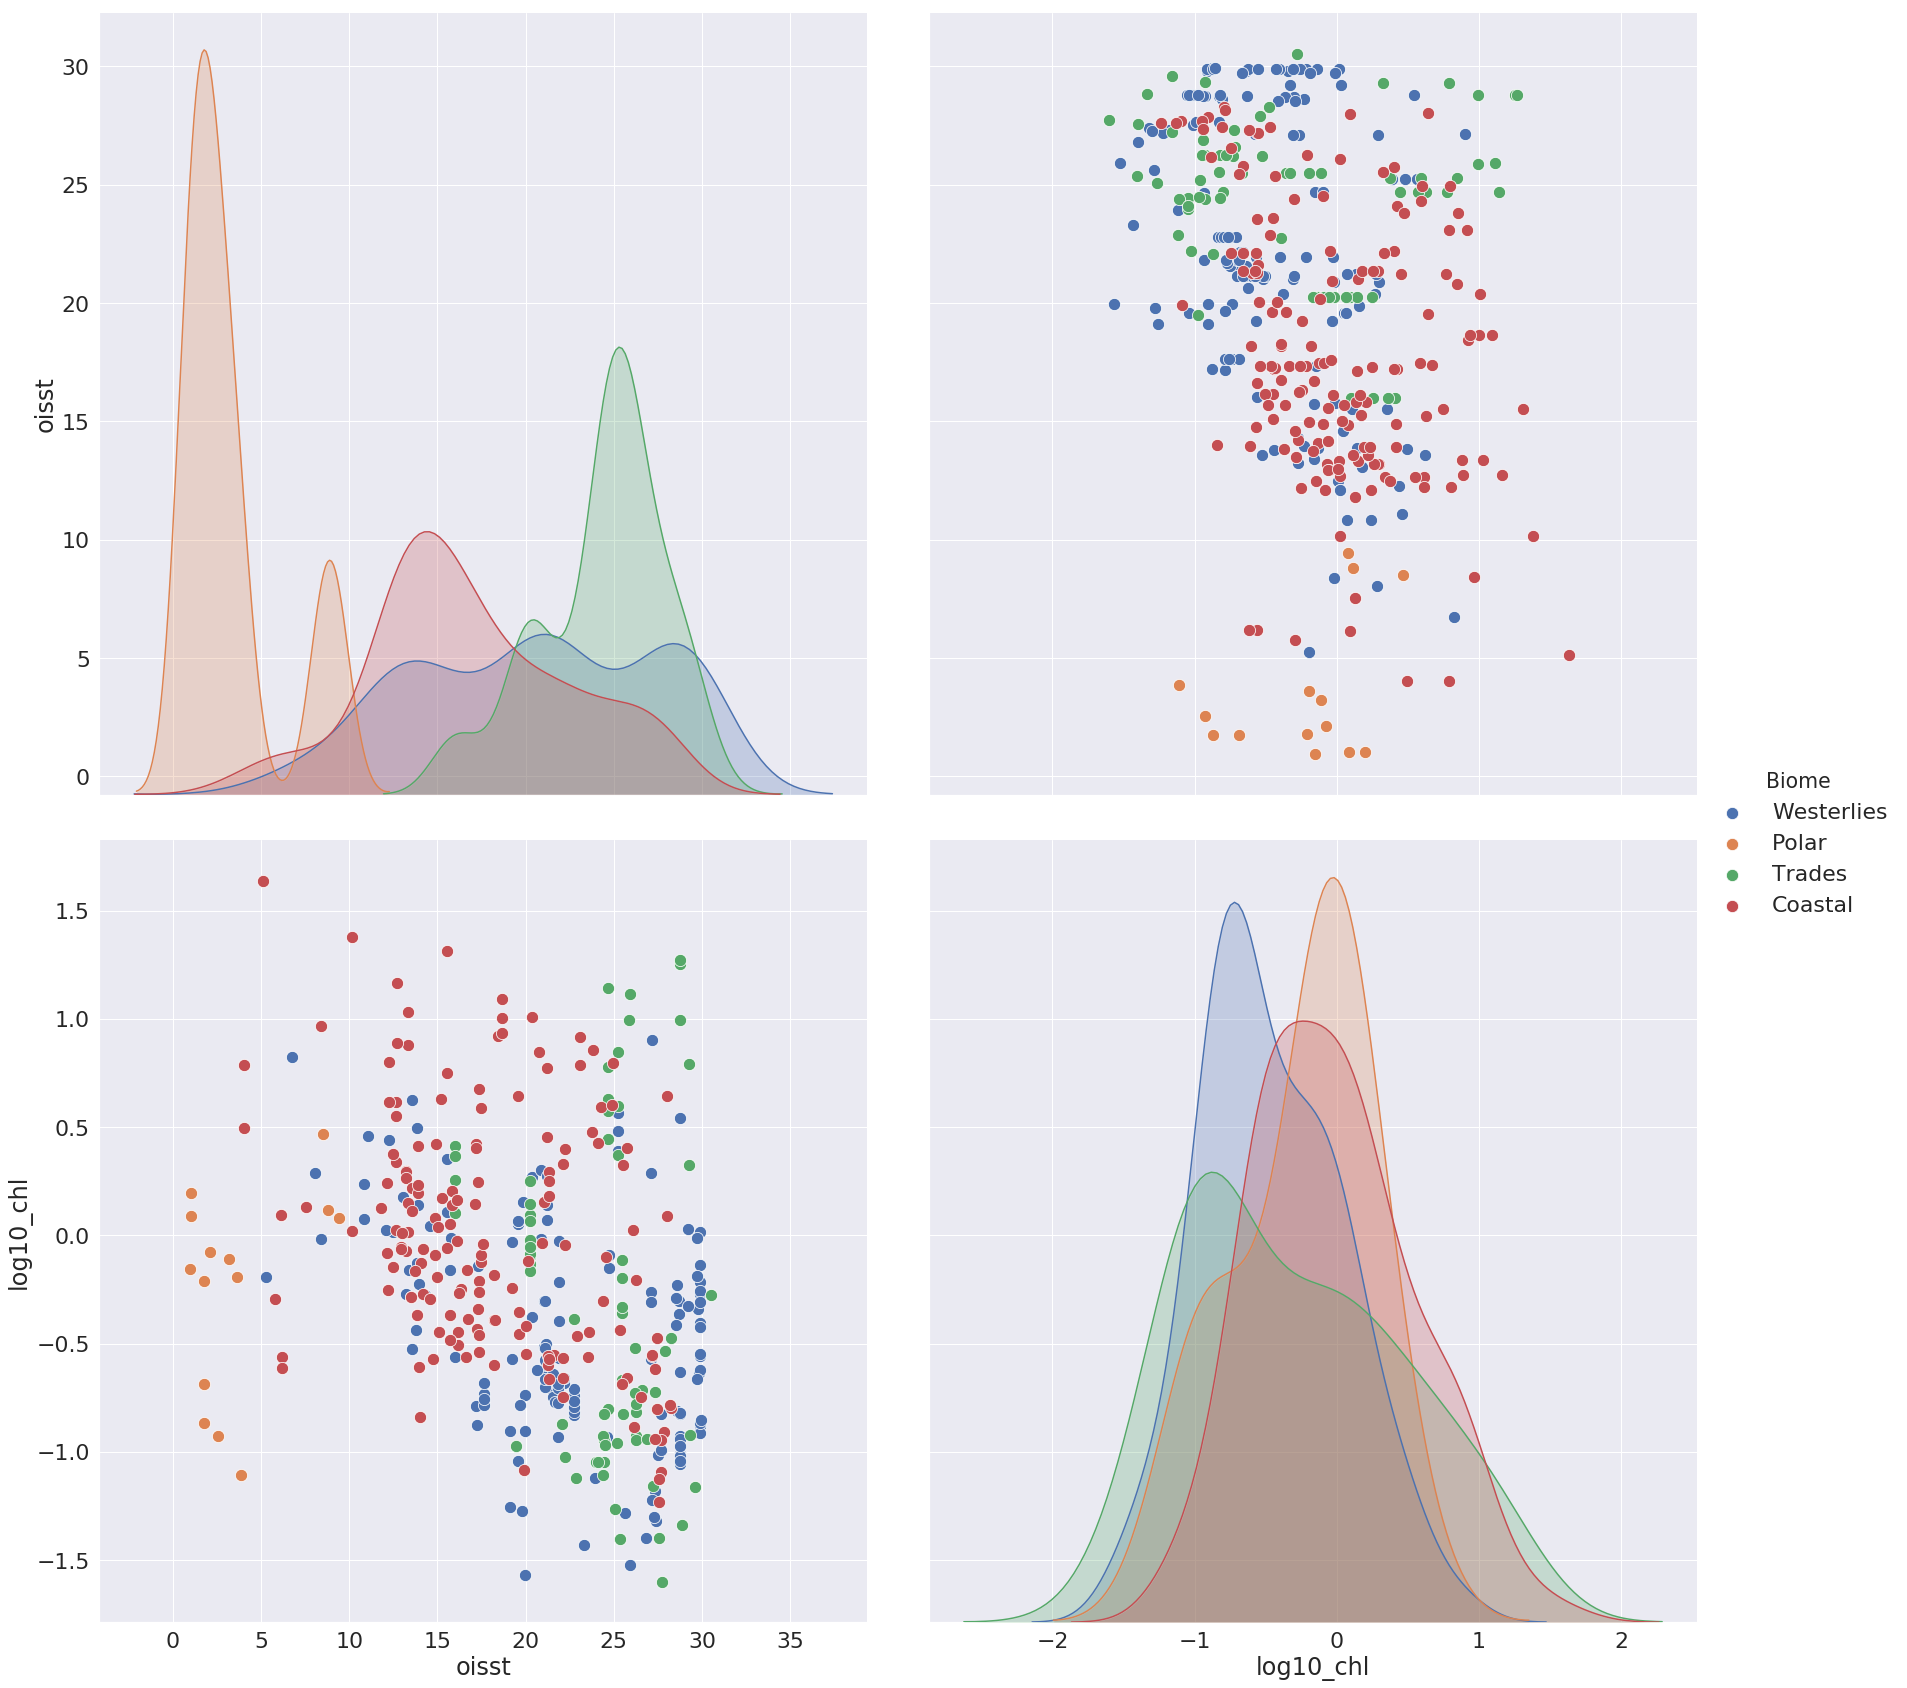

In [112]:
sb.pairplot(df[['oisst', 'log10_chl',  'Biome']], 
            vars=['oisst', 'log10_chl'], hue='Biome', height=12,
           plot_kws={'s': 150});

In [34]:
df = pd.read_pickle('./pickleJar/df_4_AllFeatures_n_Longhurst.pkl')

In [35]:
df.head().T

,0,1,2,3,4
datetime,1997-10-11 09:32:00,2000-02-22 17:00:00,2001-02-19 16:10:00,2002-01-22 13:45:00,1997-09-27 11:29:00
lat,39.29,-61.45,-61.29,-60.999,24.1392
lon,25.11,-62.299,-56.29,-56.498,-20.9995
Biome,Westerlies,Polar,Polar,Polar,Trades
BiomCat,3,1,1,1,2
Province,"Mediterranean Sea, Black Sea Province",Antarctic Province,Austral Polar Province,Austral Polar Province,N. Atlantic Tropical Gyral Province (Trpg)
ProvCode,MEDI,ANTA,APLR,APLR,NATR
Coastal,0,0,0,0,0
ProvCat,42,22,25,25,33
oisst,19.57,2.54,0.78,1.79,24.67


In [114]:
df_.head().T

,0,1,2,3,4
Coastal,1,1,1,1,1
Biome,Coastal,Coastal,Coastal,Coastal,Coastal
Province,Benguela Current Coastal Province,Benguela Current Coastal Province,Benguela Current Coastal Province,Benguela Current Coastal Province,Benguela Current Coastal Province
ProvCode,BENG,BENG,BENG,BENG,BENG
ProvCat,2,2,2,2,2
sin_doy,-0.984474,0.790946,0.758306,0.369725,-0.997917
cos_doy,0.175531,0.611886,0.651899,0.929141,-0.0645084
sin_minofday,0.601815,-0.965926,-0.887011,-0.442289,0.134851
cos_minofday,-0.798636,-0.258819,-0.461749,-0.896873,-0.990866
x,0.700808,0.222167,0.266604,0.267607,0.851946


In [38]:
df_.dropna().index

Int64Index([  0,   1,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            485, 486, 487, 488, 489, 490, 491, 492, 493, 494],
           dtype='int64', length=423)

In [42]:
df_.loc[:, 'sin_doy':'PC6'].head().T

,0,1,2,3,4
sin_doy,-9.844738e-01,7.909457e-01,7.583058e-01,3.697245e-01,-9.979172e-01
cos_doy,1.755315e-01,6.118864e-01,6.518990e-01,9.291414e-01,-6.450845e-02
sin_minofday,6.018150e-01,-9.659258e-01,-8.870108e-01,-4.422887e-01,1.348509e-01
cos_minofday,-7.986355e-01,-2.588190e-01,-4.617486e-01,-8.968727e-01,-9.908659e-01
x,7.008083e-01,2.221672e-01,2.666040e-01,2.676069e-01,8.519460e-01
y,3.284318e-01,-4.231483e-01,-3.996048e-01,-4.042793e-01,-3.270229e-01
z,6.332458e-01,-8.784004e-01,-8.770623e-01,-8.746112e-01,4.089549e-01
log10_etopo2,2.664642e+00,3.550106e+00,2.518514e+00,3.341039e+00,3.640382e+00
oisst,1.957000e+01,2.540000e+00,7.800000e-01,1.790000e+00,2.467000e+01
solz,4.870000e+01,5.120000e+01,5.270000e+01,4.590000e+01,2.800000e+01


In [43]:
df_.to_pickle('./pickleJar/df_5_AllFeatures_w_Longhurst.pkl')